# **Data Preparation**

In [1]:
!wget https://raw.githubusercontent.com/keerthy456/Machine-Learning-Final-Project-Vakkalagadda-Keerthi/main/heart_disease.csv

--2022-05-06 04:10:42--  https://raw.githubusercontent.com/keerthy456/Machine-Learning-Final-Project-Vakkalagadda-Keerthi/main/heart_disease.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25189554 (24M) [text/plain]
Saving to: ‘heart_disease.csv.2’

heart_disease.csv.2 100%[===================>]  24.02M   118MB/s    in 0.2s    

2022-05-06 04:10:44 (118 MB/s) - ‘heart_disease.csv.2’ saved [25189554/25189554]



In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [4]:
heart_df = pd.read_csv('heart_disease.csv')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

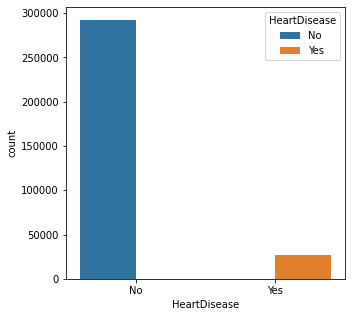

In [5]:
plt.figure(figsize = (5,5))
sns.countplot(x = heart_df['HeartDisease'], hue = 'HeartDisease', data = heart_df)

Sampling Dataset

In [6]:
class_no = heart_df[heart_df['HeartDisease'] == 'No']
class_yes = heart_df[heart_df['HeartDisease'] == 'Yes']

In [130]:
len(class_no)

292422

In [7]:
class_no = class_no.sample(len(class_yes),replace=False)
new_df = pd.concat([class_no, class_yes], axis=0)
print('Target class Distibution after Sampling in :')
print(new_df['HeartDisease'].value_counts())
heart_df = new_df.copy()

Target class Distibution after Sampling in :
No     27373
Yes    27373
Name: HeartDisease, dtype: int64


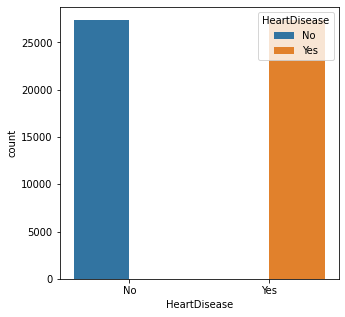

In [172]:
plt.figure(figsize = (5,5))
sns.countplot(x = new_df['HeartDisease'], hue = 'HeartDisease', data = new_df)

In [210]:
pip install dython

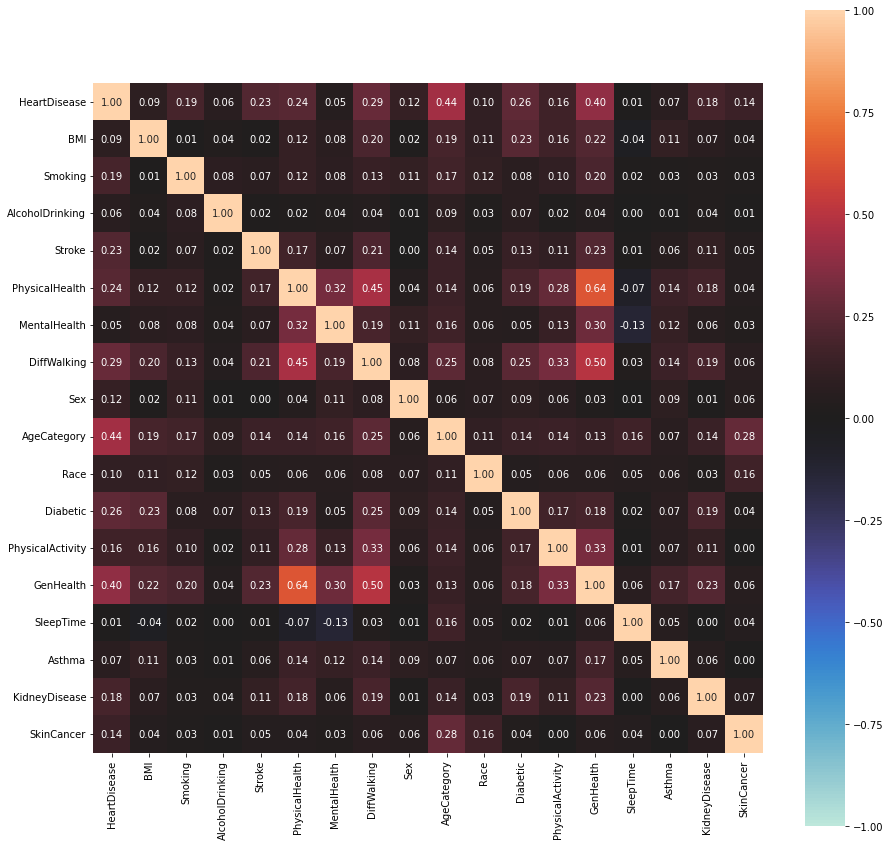

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5f6b3c2c50>,
 'corr':                   HeartDisease       BMI   Smoking  AlcoholDrinking    Stroke  \
 HeartDisease          1.000000  0.086123  0.186801         0.062757  0.226331   
 BMI                   0.086123  1.000000  0.011327         0.035059  0.019529   
 Smoking               0.186801  0.011327  1.000000         0.083308  0.074551   
 AlcoholDrinking       0.062757  0.035059  0.083308         1.000000  0.019428   
 Stroke                0.226331  0.019529  0.074551         0.019428  1.000000   
 PhysicalHealth        0.241695  0.119827  0.124253         0.024145  0.170454   
 MentalHealth          0.047635  0.076881  0.083622         0.038517  0.073347   
 DiffWalking           0.287334  0.197973  0.128690         0.042537  0.205807   
 Sex                   0.123744  0.019856  0.111418         0.005145  0.000000   
 AgeCategory           0.440379  0.186255  0.165518         0.090602  0.142291   
 Race                  0

In [215]:
from dython.nominal import associations
associations(heart_df, figsize=(15,15))

By looking at the above coorelation matrix I believe 'Alcohol Drinking', 'Mental Health', 'Sleep Time', 'Race' doesnot seem to be highly coorelated (individually/when combined with other features as well) with 'Target Feature - Heart Disease'. So I'll be dropping them from my dataset and train the model with remaining features.

In [8]:
numeric_features = heart_df.select_dtypes(include=[np.number])

In [134]:
categorical_features= [col for col in heart_df.columns if heart_df[col].dtypes == 'object']

In [124]:
heart_df.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [9]:
heart_df = heart_df.drop(columns=['AlcoholDrinking', 'SleepTime', 'MentalHealth', 'Race'])

In [10]:
heart_df['heartdisease_GenHealth'] = heart_df.groupby('GenHealth')['HeartDisease'].transform('count') 
heart_df['mean_PhysicalHealth'] = heart_df.groupby('DiffWalking')['PhysicalHealth'].transform('mean') 
heart_df['BMI_Std'] = heart_df.groupby('PhysicalActivity')['BMI'].transform('std')

In [11]:
heart_df.groupby('GenHealth').count()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,heartdisease_GenHealth,mean_PhysicalHealth,BMI_Std
GenHealth,,,,,,,,,,,,,,,,
Excellent,7664,7664,7664,7664,7664,7664,7664,7664,7664,7664,7664,7664,7664,7664,7664,7664
Fair,9716,9716,9716,9716,9716,9716,9716,9716,9716,9716,9716,9716,9716,9716,9716,9716
Good,17304,17304,17304,17304,17304,17304,17304,17304,17304,17304,17304,17304,17304,17304,17304,17304
Poor,4537,4537,4537,4537,4537,4537,4537,4537,4537,4537,4537,4537,4537,4537,4537,4537
Very good,15525,15525,15525,15525,15525,15525,15525,15525,15525,15525,15525,15525,15525,15525,15525,15525


In [12]:
heart_df.head()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,heartdisease_GenHealth,mean_PhysicalHealth,BMI_Std
249975,No,24.96,No,No,0.0,No,Female,65-69,No,Yes,Good,No,No,No,17304,2.801344,5.916689
311944,No,28.19,Yes,No,0.0,No,Female,65-69,No,Yes,Excellent,No,No,Yes,7664,2.801344,5.916689
63414,No,23.40,Yes,No,0.0,No,Male,70-74,No,Yes,Very good,No,No,No,15525,2.801344,5.916689
175588,No,30.52,Yes,No,0.0,No,Male,70-74,Yes,Yes,Good,No,No,No,17304,2.801344,5.916689
144586,No,28.97,Yes,No,0.0,No,Male,50-54,No,No,Good,No,No,No,17304,2.801344,7.455474


In [13]:
print('\nCategorical Columns\n')
heart_df.select_dtypes(include=['O']).nunique()


Categorical Columns



HeartDisease         2
Smoking              2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Diabetic             4
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64

From the above output we can see some of the categorical features are binary class variables which has 2 uniques values -yes/no, and some have more than 2 class values. So, for encoding binary features I've used Label encoder for converting yes/no to either 1 or 0 and dummies technique is used for categorical columns which has more than two unique values. Coming to dropping the unnecessary columns, I did not drop any columns because the dataset does not have any unique identifiers/ patient name/ address/zip code information and based on my intuition everything seems important. However the age Category is in categorical(each value is specified as range) and I'm converting it into integer by taking the mean if the given range.

In [14]:
for col in ['HeartDisease', 'Smoking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if heart_df[col].dtype == 'O':
        le = LabelEncoder()
        heart_df[col] = le.fit_transform(heart_df[col])

In [15]:
heart_df.head()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,heartdisease_GenHealth,mean_PhysicalHealth,BMI_Std
249975,0,24.96,0,0,0.0,0,0,65-69,No,1,Good,0,0,0,17304,2.801344,5.916689
311944,0,28.19,1,0,0.0,0,0,65-69,No,1,Excellent,0,0,1,7664,2.801344,5.916689
63414,0,23.40,1,0,0.0,0,1,70-74,No,1,Very good,0,0,0,15525,2.801344,5.916689
175588,0,30.52,1,0,0.0,0,1,70-74,Yes,1,Good,0,0,0,17304,2.801344,5.916689
144586,0,28.97,1,0,0.0,0,1,50-54,No,0,Good,0,0,0,17304,2.801344,7.455474


In [16]:
categoricals = heart_df[['GenHealth','Diabetic']]
categoricals.head()

,GenHealth,Diabetic
249975,Good,No
311944,Excellent,No
63414,Very good,No
175588,Good,Yes
144586,Good,No


In [17]:
cat_dummies = pd.get_dummies(categoricals, drop_first=True)
cat_dummies.head()

,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
249975,0,1,0,0,0,0,0
311944,0,0,0,0,0,0,0
63414,0,0,0,1,0,0,0
175588,0,1,0,0,0,1,0
144586,0,1,0,0,0,0,0


In [18]:
# Drop the redundant columns
heart_df.drop(list(categoricals.columns), axis=1, inplace=True)
# concat the heart and dummies data frames.
heart_df = pd.concat([heart_df, cat_dummies], axis=1)
heart_df.head()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,Asthma,...,heartdisease_GenHealth,mean_PhysicalHealth,BMI_Std,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
249975,0,24.96,0,0,0.0,0,0,65-69,1,0,...,17304,2.801344,5.916689,0,1,0,0,0,0,0
311944,0,28.19,1,0,0.0,0,0,65-69,1,0,...,7664,2.801344,5.916689,0,0,0,0,0,0,0
63414,0,23.40,1,0,0.0,0,1,70-74,1,0,...,15525,2.801344,5.916689,0,0,0,1,0,0,0
175588,0,30.52,1,0,0.0,0,1,70-74,1,0,...,17304,2.801344,5.916689,0,1,0,0,0,1,0
144586,0,28.97,1,0,0.0,0,1,50-54,0,0,...,17304,2.801344,7.455474,0,1,0,0,0,0,0


In [19]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
heart_df['AgeCategory'] = heart_df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
heart_df['AgeCategory'] = heart_df['AgeCategory'].astype('int64')

In [20]:
heart_df.head()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,Asthma,...,heartdisease_GenHealth,mean_PhysicalHealth,BMI_Std,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
249975,0,24.96,0,0,0.0,0,0,67,1,0,...,17304,2.801344,5.916689,0,1,0,0,0,0,0
311944,0,28.19,1,0,0.0,0,0,67,1,0,...,7664,2.801344,5.916689,0,0,0,0,0,0,0
63414,0,23.40,1,0,0.0,0,1,72,1,0,...,15525,2.801344,5.916689,0,0,0,1,0,0,0
175588,0,30.52,1,0,0.0,0,1,72,1,0,...,17304,2.801344,5.916689,0,1,0,0,0,1,0
144586,0,28.97,1,0,0.0,0,1,52,0,0,...,17304,2.801344,7.455474,0,1,0,0,0,0,0


### **Normalization/Scaling**

The range of continuous features are different.
Here, I am scaling them to be in-between 0 to 1 by dividing by the maximum value of the respective column

In [21]:
from sklearn.preprocessing import StandardScaler 
num_cols = ['BMI', 'PhysicalHealth']
scaler = StandardScaler()
heart_df[num_cols] = scaler.fit_transform(heart_df[num_cols])

In [22]:
heart_df.describe()[1:][['BMI','PhysicalHealth']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,0.000000,1.000009,-2.573955,-0.682142,-0.162125,0.495226,8.948204
PhysicalHealth,-0.000000,1.000009,-0.538968,-0.538968,-0.538968,-0.036554,2.475512


In [23]:
heart_df = heart_df.drop(columns = ['heartdisease_GenHealth', 'mean_PhysicalHealth','BMI_Std',])

In [24]:
#Select Features
features = heart_df.drop(columns =['HeartDisease'], axis = 1)
#Select Target 
target = heart_df['HeartDisease']
# Set Training and Testing Data
from sklearn.model_selection import train_test_split


In [25]:
high = len(heart_df['HeartDisease']) - sum(heart_df['HeartDisease'])
print("Baseline accuracy : ",high/len(heart_df['HeartDisease']))

Baseline accuracy :  0.5


In [26]:
from sklearn import metrics

Linear Regression

In [62]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, random_state=33)

In [61]:
# plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
score = lin_reg.score(X_test,y_test)

print("Linear Regression Accuracy",score)

Linear Regression Accuracy 0.3319457969522649


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


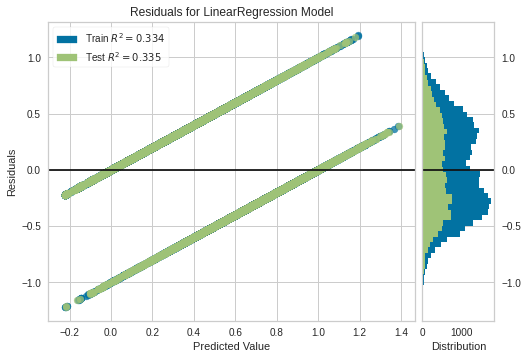

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [30]:
from yellowbrick.regressor import ResidualsPlot
visual = ResidualsPlot(lin_reg)
visual.fit(X_train,y_train)
visual.score(X_test,y_test)
visual.poof()

Decision Tree

In [63]:
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = metrics.accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy",100*dt_acc)

Decision Tree Accuracy 72.94977168949772


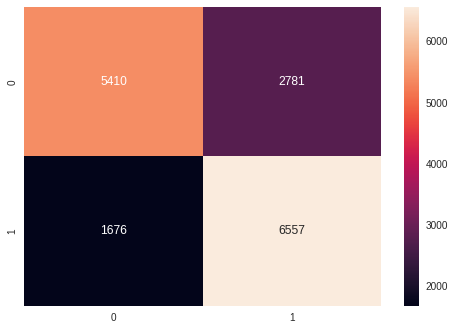

In [53]:
con_matrix = confusion_matrix(y_test,dt_pred)
sns.heatmap(con_matrix,annot=True,fmt="d") 
plt.show()

In [55]:
size = 0.1
accuracy_list=[]
dataset_ratio = []
for i in range(1,10):
  print('Test set size: ',(size))
  index = int((i/10)*len(new_df['HeartDisease']))
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = (i/10), random_state=100)
  dt_clf1 = DecisionTreeClassifier()
  dt_clf1.fit(X_train, y_train)
  dt_pred = dt_clf1.predict(X_test)
  dt_acc1 = metrics.accuracy_score(y_test, dt_pred)
  accuracy_list.append(100*dt_acc1)
  print("Accuracy: ",100*dt_acc1)
  size = round(size, 1)
  dataset_ratio.append(str(i/10)+'%')
  size = round((size+0.1), 1)

Test set size:  0.1
Accuracy:  68.18264840182648
Test set size:  0.2
Accuracy:  68.80365296803653
Test set size:  0.3
Accuracy:  68.11373599610326
Test set size:  0.4
Accuracy:  67.6743230284488
Test set size:  0.5
Accuracy:  67.58849961641033
Test set size:  0.6
Accuracy:  67.07866536775451
Test set size:  0.7
Accuracy:  67.15027529160035
Test set size:  0.8
Accuracy:  66.76713016873302
Test set size:  0.9
Accuracy:  66.39673648319533


do sampling 

(65.0, 70.0)

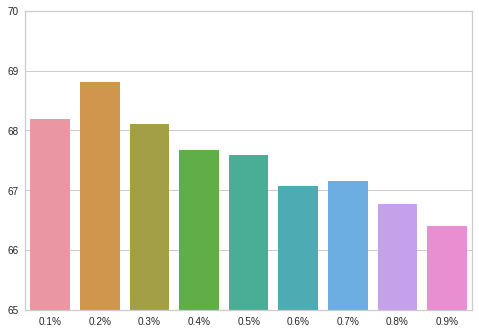

In [57]:
g = sns.barplot(x = dataset_ratio, y=accuracy_list)
g.set_ylim(65,70)

For our conclusion, this dataset does not suitable for classification in Heart Disease cause data overlapping, unbalanced data, low correlation and a lot of outliers.One single feature might not say much but combinations might say more than that! I will perform this in another notebook

In [45]:
from sklearn import tree

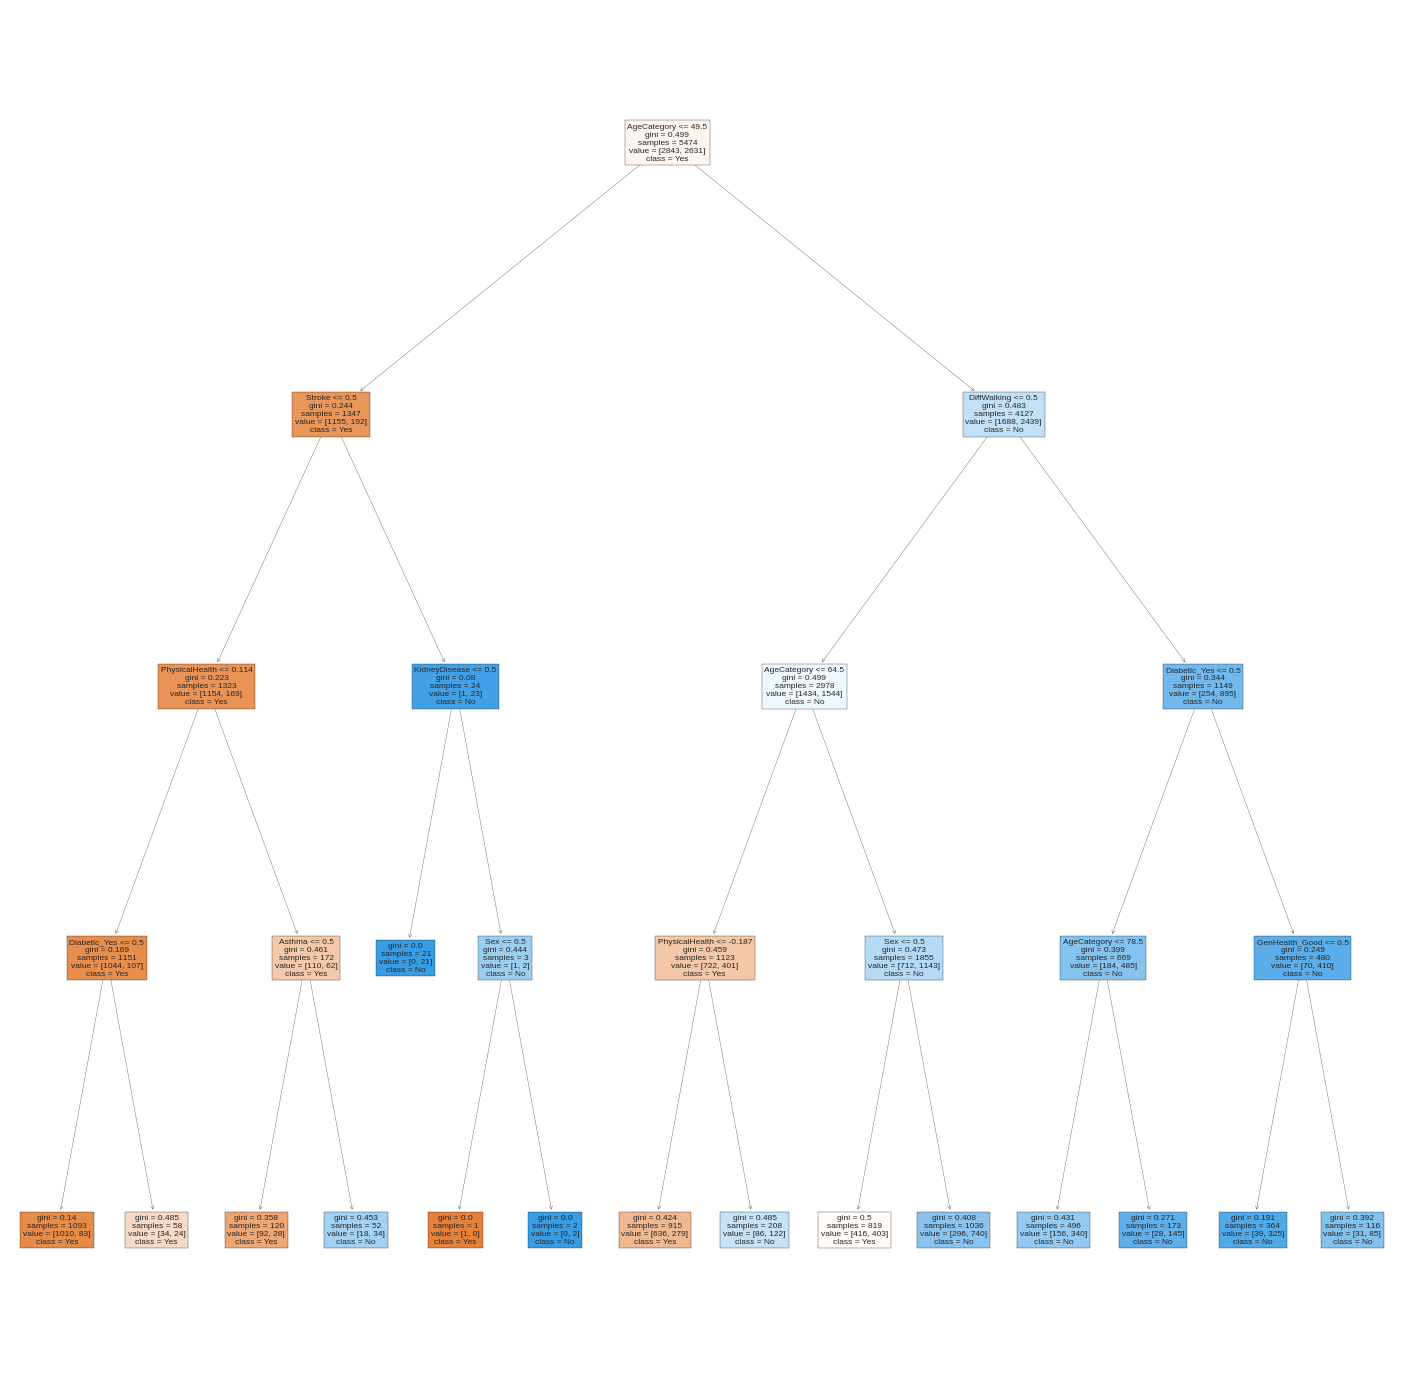

In [46]:
fig = plt.figure(figsize=(25,25))
v = tree.plot_tree(dt_clf, 
                   feature_names=features.columns,  
                   class_names=['Yes', 'No'],
                   filled=True)